# Lab 02
## Part A - Force and Motion
### Exercise 01
##### Module Imports

In [9]:
from matplotlib import pyplot

##### Constants

In [10]:
GRAVITY = 9.81
INI_VEL = -10
HEIGHT = 30

#### Part A

In [11]:
def throw_ball(gravity, ini_vel, height, time_step):
    s = 0
    v = ini_vel
    t = 0
    
    s_list = []
    v_list = []
    t_list = []

    s_list.append(height)
    v_list.append(abs(ini_vel))
    t_list.append(0)

    while (s < height):
        t += time_step
        v += gravity * time_step
        s = t * (ini_vel + 0.5 * gravity * t)
        t_list.append(t)
        v_list.append(abs(v))
        s_list.append(height - s)

    return s_list, v_list, t_list

#### Part B

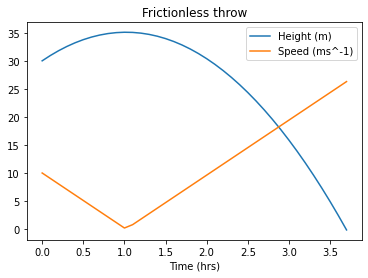

In [12]:
s_list, v_list, t_list = throw_ball(GRAVITY, INI_VEL, HEIGHT, 0.1)
pyplot.title("Frictionless throw")
pyplot.xlabel("Time (hrs)")
pyplot.plot(t_list, s_list, label="Height (m)")
pyplot.plot(t_list, v_list, label="Speed (ms^-1)")
pyplot.legend()
pyplot.show()